## Problem Sets 2
### Li Liu
5/12/19

In [17]:
import numpy as np
import scipy.optimize as opt
import scipy.interpolate as intpl
import matplotlib.pyplot as plt

Problem 1

(a)

In [18]:
beta = 0.9
gamma = 2.2
W_min = 0.1
W_max = 10.0
W_size = 30
W_vec = np.linspace(W_min, W_max, W_size)
V_t = np.log(W_vec)
eps_vec = np.array([-1.4, -0.55, 0, 0.55, 1.4])
eps_prob = np.array([0.1, 0.2, 0.4, 0.2, 0.1])
eps_size = eps_vec.shape[0]

def util_CRRA(W, W_pr, gamma):
    # Define CRRA utility function
    c = W - W_pr
    util = (c ** (1 - gamma) - 1) / (1 - gamma)
    
    return util

def neg_V_iid(W_pr, *args):
    #pass in values
    W, eps, util, Exp_V_t_interp, gamma, beta = args
    #write bellman equation
    Vtp1 = np.exp(eps)*util(W, W_pr, gamma) + beta * Exp_V_t_interp(W_pr)
    #take negative to use miniziation fn
    neg_Vtp1 = -Vtp1
    
    return neg_Vtp1

In [19]:
V_init = np.zeros((W_size, eps_size))
V_new = V_init.copy()

VF_iter = 0
VF_dist = 10
VF_maxiter = 200
VF_mindist = 1e-8

while (VF_iter < VF_maxiter) and (VF_dist > VF_mindist):
    VF_iter += 1
    V_init = V_new.copy()
    V_new = np.zeros((W_size, eps_size))
    psi_mat = np.zeros((W_size, eps_size))
    
    Exp_V = V_init @ eps_prob.reshape((eps_size,1))
    
    Exp_V_interp = intpl.interp1d(W_vec, Exp_V.flatten(), kind='cubic',
                                   fill_value='extrapolate')

    for eps_ind in range(eps_size):
   
        for W_ind in range(W_size):
            W = W_vec[W_ind]
            eps = eps_vec[eps_ind]
            V_args = (W, eps, util_CRRA, Exp_V_interp, gamma, beta)
            results1 = opt.minimize_scalar(neg_V_iid, bounds=(1e-10, W - 1e-10),
                                              args=V_args, method='bounded')
            V_new[W_ind, eps_ind] = -results1.fun
            psi_mat[W_ind, eps_ind] = results1.x

    VF_dist = ((V_init - V_new) ** 2).sum()
    print('VF_iter=', VF_iter, ', VF_dist=', VF_dist)

VF_iter= 1 , VF_dist= 3494.416552492849
VF_iter= 2 , VF_dist= 3288.97756021794
VF_iter= 3 , VF_dist= 4368.033199294506
VF_iter= 4 , VF_dist= 5171.123172733096
VF_iter= 5 , VF_dist= 5690.816865389138
VF_iter= 6 , VF_dist= 5962.334129328163
VF_iter= 7 , VF_dist= 6029.410863441402
VF_iter= 8 , VF_dist= 5938.006359170565
VF_iter= 9 , VF_dist= 5728.733568262047
VF_iter= 10 , VF_dist= 5436.089591828781
VF_iter= 11 , VF_dist= 5088.450567375282
VF_iter= 12 , VF_dist= 4708.59571120794
VF_iter= 13 , VF_dist= 4314.425870978348
VF_iter= 14 , VF_dist= 3919.6529865086663
VF_iter= 15 , VF_dist= 3534.453890340008
VF_iter= 16 , VF_dist= 3166.0717799093586
VF_iter= 17 , VF_dist= 2819.3724059117317
VF_iter= 18 , VF_dist= 2497.3313722144744
VF_iter= 19 , VF_dist= 2201.4557625474654
VF_iter= 20 , VF_dist= 1932.1399178953154
VF_iter= 21 , VF_dist= 1688.9596638065204
VF_iter= 22 , VF_dist= 1470.9108719157346
VF_iter= 23 , VF_dist= 1276.599370227533
VF_iter= 24 , VF_dist= 1104.3893159738996
VF_iter= 25 , VF_d

(b)

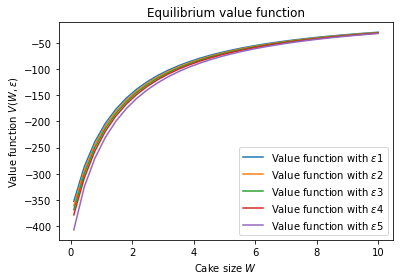

In [20]:
for i in range(5):
    plt.plot(W_vec, V_new[:,i], label='Value function with $\epsilon${}'.format(i+1))
plt.title('Equilibrium value function')
plt.xlabel('Cake size $W$')
plt.ylabel('Value function $V(W, \epsilon)$')
plt.legend()

(c)

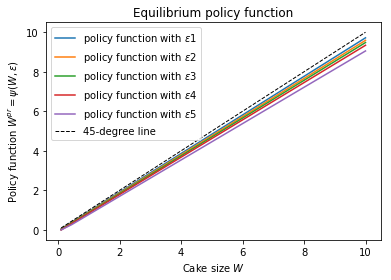

In [21]:
for i in range(5):
    plt.plot(W_vec, psi_mat[:,i], 
             label='policy function with $\epsilon${}'.format(i+1))
plt.plot(W_vec, W_vec, color = 'black', linewidth=1, linestyle='--',
         label='45-degree line')
plt.title('Equilibrium policy function')
plt.xlabel('Cake size $W$')
plt.ylabel('Policy function $W^{pr}=\psi(W, \epsilon)$')
plt.legend()

Problem 2

(a)

In [22]:
trans_mat = np.array([[0.4,0.28,0.18,0.1,0.04],
                     [0.2, 0.4, 0.2, 0.13, 0.17],
                     [0.1, 0.2, 0.4, 0.2, 0.2],
                     [0.07, 0.13, 0.2, 0.4, 0.2],
                     [0.04, 0.1, 0.18, 0.28, 0.4]])
trans_mat.shape

(5, 5)

In [23]:
V_init = np.zeros((W_size, eps_size))
V_new = V_init.copy()

VF_iter = 0
VF_dist = 10
VF_maxiter = 200
VF_mindist = 1e-8

while (VF_iter < VF_maxiter) and (VF_dist > VF_mindist):
    VF_iter += 1
    V_init = V_new.copy()
    V_new = np.zeros((W_size, eps_size))
    psi_mat = np.zeros((W_size, eps_size))
    
    

    for eps_ind in range(eps_size):
        
        trans_mat_ind = trans_mat[eps_ind,:]
        Exp_V = V_init@trans_mat_ind.reshape((eps_size,1))
        Exp_V_interp = intpl.interp1d(W_vec, Exp_V.flatten(), kind='cubic',
                                   fill_value='extrapolate')

        
        for W_ind in range(W_size):
            W = W_vec[W_ind]
            eps = eps_vec[eps_ind]
            V_args = (W, eps, util_CRRA, Exp_V_interp, gamma, beta)
            results1 = opt.minimize_scalar(neg_V_iid, bounds=(1e-10, W - 1e-10),
                                              args=V_args, method='bounded')
            V_new[W_ind, eps_ind] = -results1.fun
            psi_mat[W_ind, eps_ind] = results1.x

    VF_dist = ((V_init - V_new) ** 2).sum()
    print('VF_iter=', VF_iter, ', VF_dist=', VF_dist)

VF_iter= 1 , VF_dist= 3494.416552492849
VF_iter= 2 , VF_dist= 5608.663059236116
VF_iter= 3 , VF_dist= 7653.926960666161
VF_iter= 4 , VF_dist= 9620.26145777854
VF_iter= 5 , VF_dist= 11315.9595796964
VF_iter= 6 , VF_dist= 12716.707171693897
VF_iter= 7 , VF_dist= 13834.318871457997
VF_iter= 8 , VF_dist= 14685.961892700829
VF_iter= 9 , VF_dist= 15293.302835128998
VF_iter= 10 , VF_dist= 15680.312511143615
VF_iter= 11 , VF_dist= 15871.76017490484
VF_iter= 12 , VF_dist= 15892.304062795687
VF_iter= 13 , VF_dist= 15765.808587292944
VF_iter= 14 , VF_dist= 15514.854112942936
VF_iter= 15 , VF_dist= 15160.421028860364
VF_iter= 16 , VF_dist= 14721.71078684761
VF_iter= 17 , VF_dist= 14216.070263679596
VF_iter= 18 , VF_dist= 13658.991232270806
VF_iter= 19 , VF_dist= 13064.161397074418
VF_iter= 20 , VF_dist= 12443.55001332793
VF_iter= 21 , VF_dist= 11807.51572116293
VF_iter= 22 , VF_dist= 11164.927118351177
VF_iter= 23 , VF_dist= 10523.289383017744
VF_iter= 24 , VF_dist= 9888.872144733017
VF_iter= 25 ,

(b)

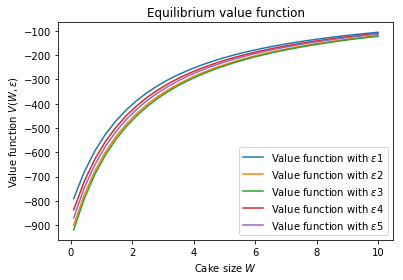

In [24]:
for i in range(5):
    plt.plot(W_vec, V_new[:,i], label='Value function with $\epsilon${}'.format(i+1))
plt.title('Equilibrium value function')
plt.xlabel('Cake size $W$')
plt.ylabel('Value function $V(W, \epsilon)$')
plt.legend()

(c)

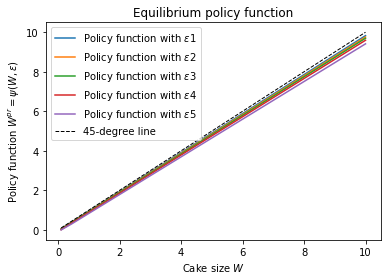

In [25]:
for i in range(5):
    plt.plot(W_vec, psi_mat[:,i], label='Policy function with $\epsilon${}'.format(i+1))
plt.plot(W_vec, W_vec, color = 'black', linewidth=1, linestyle='--',
         label='45-degree line')
plt.title('Equilibrium policy function')
plt.xlabel('Cake size $W$')
plt.ylabel('Policy function $W^{pr}=\psi(W, \epsilon)$')
plt.legend()